In [1]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aryanagarwal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df_fake = pd.read_csv("/Users/aryanagarwal/Downloads/archive (2)/Fake.csv")
df_true = pd.read_csv("/Users/aryanagarwal/Downloads/archive (2)/True.csv")
print("Original 'Fake' and 'True' dataframes have the shapes:", df_fake.shape, " and ", df_true.shape, "respectively.")

Original 'Fake' and 'True' dataframes have the shapes: (23481, 4)  and  (21417, 4) respectively.


In [3]:
df_fake.head(4)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"


In [4]:
df_true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [5]:
df_fake["label"] = "1"
df_true["label"] = "0"
df = pd.concat([df_fake, df_true])
df = df.sample(frac=1).reset_index(drop=True)

print("Combined dataframe has shape of ", df.shape)
df.head(3)

Combined dataframe has shape of  (44898, 5)


,title,text,subject,date,label
0,Uber agrees to settle U.S. lawsuit filed by In...,SAN FRANCISCO (Reuters) - Uber Technologies In...,worldnews,"December 9, 2017",0
1,Poll: Trump extends his lead among Republicans...,(Reuters) - Celebrity real estate developer Do...,politicsNews,"April 8, 2016",0
2,U.S. urges Iraq to avoid clashes with Kurds ne...,WASHINGTON (Reuters) - The U.S. State Departme...,worldnews,"October 20, 2017",0


In [6]:
df.text = df.title+df.text
df.drop(columns=["title", "subject", "date"], axis = 1, inplace=True)
df.head(3)

,text,label
0,Uber agrees to settle U.S. lawsuit filed by In...,0
1,Poll: Trump extends his lead among Republicans...,0
2,U.S. urges Iraq to avoid clashes with Kurds ne...,0


In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
X = df["text"]
y = df["label"]
print(X.shape, y.shape)

(44898,) (44898,)


In [9]:
stop_words = set(stopwords.words('english')) 
def LemmSentence(sentence):
    lemma_words = []
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(sentence) 
    for word in word_tokens: 
        if word not in stop_words: 
            new_word = re.sub('[^a-zA-Z]', '',word)
            new_word = new_word.lower()
            new_word = wordnet_lemmatizer.lemmatize(new_word)
            lemma_words.append(new_word)
    return " ".join(lemma_words)

X = [LemmSentence(i) for i in X]

In [10]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.shape, y.shape

((44898, 1), (44898, 1))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35918, 1), (8980, 1), (35918, 1), (8980, 1))

In [12]:
# create the transform
vectorizer = TfidfVectorizer()

# transforming
tfidf_train = vectorizer.fit_transform(x_train.iloc[:,0])
tfidf_test = vectorizer.transform(x_test.iloc[:,0])

In [13]:
tfidf_train.shape, tfidf_test.shape

((35918, 186459), (8980, 186459))

In [14]:
pac = PassiveAggressiveClassifier(random_state = 7,loss = 'squared_hinge',  max_iter = 50, C = 0.16)
pac.fit(tfidf_train, y_train.values.ravel())

#Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 99.59%


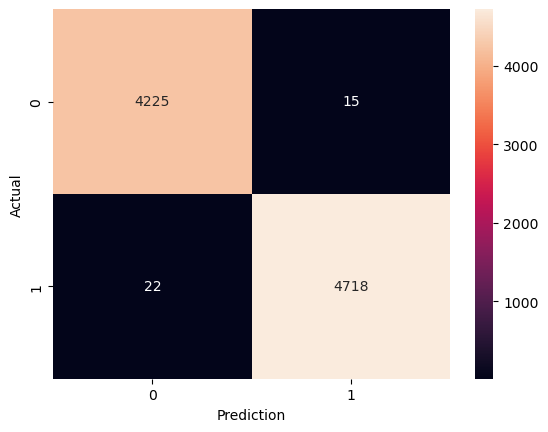

In [15]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d")
ax.set(xlabel='Prediction', ylabel='Actual')
plt.show()